In [6]:
#Import all relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtale as dt
from scipy import stats
from scipy.stats import zscore
from ydata_profiling import ProfileReport
## This statement allows the visuals to render within your Jupyter Notebook.
%matplotlib inline

## Loading the data
We can now load the dataset into pandas using the read_csv() function. This converts the CSV file into a Pandas dataframe.

In [7]:
#Read in the csv file and convert to a Pandas dataframe
sports_df = pd.read_csv("Data/final_data.csv")

### Viewing the dataframe
We can get a quick sense of the size of our dataset by using the shape method. This returns a tuple with the number of rows and columns in the dataset.

In [8]:
sports_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
0,/david-de-gea/profil/spieler/59377,Manchester United,David de Gea,Goalkeeper,189.0,32.0,104,0.000000,0.000000,0.009585,...,1.217252,0.335463,9390,42,5,13,15000000,70000000,1,0
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
2,/tom-heaton/profil/spieler/34130,Manchester United,Tom Heaton,Goalkeeper,188.0,37.0,4,0.000000,0.000000,0.000000,...,0.616438,0.924658,292,697,84,4,600000,6000000,1,0
3,/lisandro-martinez/profil/spieler/480762,Manchester United,Lisandro Martínez,Defender Centre-Back,175.0,25.0,82,0.028090,0.056180,0.224719,...,0.000000,0.000000,6408,175,22,9,50000000,50000000,2,0
4,/raphael-varane/profil/spieler/164770,Manchester United,Raphaël Varane,Defender Centre-Back,191.0,30.0,63,0.017889,0.017889,0.053667,...,0.000000,0.000000,5031,238,51,21,40000000,80000000,2,0


## 1. Data Profiling:
Data profiling is a comprehensive process of examining the data available in an existing dataset and collecting statistics and information about that data. 

In [9]:
# Generate a profiling report
profile = sports_df.profile_report(title="Football Players sports_df Profiling Report")
profile.to_file("football_players_profiling_report.html")

Summarize dataset:  83%|████████▎ | 24/29 [00:00<00:00, 44.69it/s, Calculate auto correlation]          /Users/kh/Library/Python/3.9/lib/python/site-packages/ydata_profiling/model/correlations.py:66: UserWarning:

There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Goalkeeper'')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 97.16it/s]


In [10]:
sports_df.describe

<bound method NDFrame.describe of                                           player                      team  \
0             /david-de-gea/profil/spieler/59377         Manchester United   
1            /jack-butland/profil/spieler/128899         Manchester United   
2               /tom-heaton/profil/spieler/34130         Manchester United   
3       /lisandro-martinez/profil/spieler/480762         Manchester United   
4          /raphael-varane/profil/spieler/164770         Manchester United   
...                                          ...                       ...   
10749       /aidan-simmons/profil/spieler/867763  Western Sydney Wanderers   
10750        /kusini-yengi/profil/spieler/708099  Western Sydney Wanderers   
10751    /nathanael-blair/profil/spieler/1023268  Western Sydney Wanderers   
10752    /zachary-sapsford/profil/spieler/703657  Western Sydney Wanderers   
10753  /alexander-badolato/profil/spieler/957230  Western Sydney Wanderers   

                     name    

The process of profiling differs slightly for categorical and numerical variables due to their inherent differences.

**The two main types of data are:**
- Quantitative (numerical) data
- Qualitative (categorical) data

### Data Quality Checks
Data quality checks involve the process of ensuring that the data is accurate, complete, consistent, relevant, and reliable. 


**Here are typical steps involved in checking data quality:**

#### 1. Reliability:
Evaluate the data's source and collection process to determine its trustworthiness.

#### <span style="color:cyan"> **Source:** *KHANG HUYNH NGUYEN - Football Plyers*</span>
#### <span style="color:cyan"> **License:** *Not specified but the Usability is 10.00*</span>

#### 2. Timeliness: 
Ensure the data is up-to-date and reflective of the current situation or the period of interest for the analysis.

#### <span style="color:cyan"> **Timeliness:** *Expected update frequency Not specified - Last UPDATED from 9 MONTHS AGO*</span>

#### 3. Consistency: 

Confirm that the data is consistent within the dataset and across multiple data sources. For example, the same data point should not have different values in different places.


#### <span style="color:cyan"> **Consistency:** *Only one file*</span>

#### 4. Relevance: 
Assess whether the data is appropriate and applicable for the intended analysis. Data that is not relevant can skew results and lead to incorrect conclusions.

**Key considerations for relevance include:**

> 1. Sample Appropriateness: Confirm that your data sample aligns with your analysis objectives. For instance, utilizing data from the Northern region will not yield accurate insights for the Western region of the Kingdom.
>
> 2. Variable Selection: Any column will not be relevant for our analysis, we can get rid of these using the drop() method. We will set the “axis” argument to 1 since we’re dealing with columns, and set the “inplace” argument to True to make the change permanent.


In [11]:
sports_df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [12]:
sports_df.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

#### 5. Uniqueness: 
Check for and remove duplicate records to prevent skewed analysis results.


In [13]:
sports_df.duplicated().sum()

0

#### <span style="color:cyan"> *We dont have any duplicated wich is sound good*</span>

In [14]:
# go to delete duplicates columns

#### 6. Completeness: 
Ensure that no critical data is missing. This might mean checking for null values or required fields that are empty.

We will start by checking the dataset for missing or null values. For this, we can use the isna() method which returns a dataframe of boolean values indicating if a field is null or not. To group all missing values by column, we can include the sum() method.

In [15]:
sports_df.isna().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

#### <span style="color:cyan"> *We dont have any null values wich is sound good*</span>

In [16]:
#Display number missing values per column

In [17]:
sports_df.isnull().sum()

player                 0
team                   0
name                   0
position               0
height                 0
age                    0
appearance             0
goals                  0
assists                0
yellow cards           0
second yellow cards    0
red cards              0
goals conceded         0
clean sheets           0
minutes played         0
days_injured           0
games_injured          0
award                  0
current_value          0
highest_value          0
position_encoded       0
winger                 0
dtype: int64

In [18]:
# go to clean them 

#### 7. Check Accuracy:

Verify that the data is correct and precise. This could involve comparing data samples with known sources or using validation rules.

**The process includes:**
1. Validating the appropriateness of data types for the dataset.
2. Identifying outliers  using established validation  rule

In [19]:
# check columns types 
sports_df.dtypes

player                  object
team                    object
name                    object
position                object
height                 float64
age                    float64
appearance               int64
goals                  float64
assists                float64
yellow cards           float64
second yellow cards    float64
red cards              float64
goals conceded         float64
clean sheets           float64
minutes played           int64
days_injured             int64
games_injured            int64
award                    int64
current_value            int64
highest_value            int64
position_encoded         int64
winger                   int64
dtype: object

In [20]:
categorical_columns = ['position', 'team', 'name']
value_frequency = {column: sports_df[column].value_counts() for column in categorical_columns}
value_frequency

{'position': position
 Defender Centre-Back          1821
 Attack Centre-Forward         1353
 Goalkeeper                    1229
 midfield-CentralMidfield      1149
 midfield-DefensiveMidfield     900
 Defender Right-Back            867
 Defender Left-Back             807
 midfield-AttackingMidfield     769
 Attack-RightWinger             717
 Attack-LeftWinger              714
 midfield-RightMidfield         102
 midfield-LeftMidfield          100
 midfield                        75
 Attack-SecondStriker            65
 Attack                          53
 Defender                        33
 Name: count, dtype: int64,
 'team': team
 Daejeon Hana Citizen      46
 Jeonbuk Hyundai Motors    46
 FC Seoul                  45
 Gangwon FC                43
 Daegu FC                  42
                           ..
 FC Barcelona              22
 Atlético de Madrid        22
 CA Osasuna                22
 Hatayspor                 12
 Gaziantep FK               6
 Name: count, Length: 374, dty

In [21]:
# go to clean them 

In [22]:
# check outliers
ranges = sports_df.describe().loc[['min', 'max']]
ranges 

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
min,156.0,15.0,0.0,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
max,206.0,43.0,107.0,11.25,4.0,30.0,1.0,6.923077,9.0,90.0,9510.0,2349.0,339.0,92.0,180000000.0,200000000.0,4.0,1.0


In [23]:
# Unique Values count
unique_values = sports_df.nunique()
unique_values

player                 10754
team                     374
name                   10584
position                  16
height                    47
age                       30
appearance               108
goals                   5329
assists                 5065
yellow cards            6291
second yellow cards     1095
red cards               1219
goals conceded           742
clean sheets             635
minutes played          5036
days_injured             772
games_injured            154
award                     46
current_value            128
highest_value            156
position_encoded           4
winger                     2
dtype: int64

**What is an Outlier?** 
Outlier is an row/observation that appears far away and diverges from an overall pattern in a sample.

**What are the types of Outliers?**
1. Univariate: These outliers can be found when we look at distribution of a single variable
2. Multivariate: are outliers in an n-dimensional space. In order to find them, you have to look at distributions in multi-dimensions. example (hight=100, weight=100) for a person

**What causes Outliers?**
Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence.

Let’s understand various types of outliers:

1. Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
2. Measurement Error: It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.
3. Data Processing Error: Whenever we perform data mining, we extract data from multiple sources. It is possible that some manipulation or extraction errors may lead to outliers in the dataset.
4. Sampling error: For instance, we have to measure the height of athletes. By mistake, we include a few basketball players in the sample. This inclusion is likely to cause outliers in the dataset.
5. Natural Outlier: When an outlier is not artificial (due to error), it is a natural outlier. For instance: In my last assignment with one of the renowned insurance company, I noticed that the performance of top 50 financial advisors was far higher than rest of the population. Surprisingly, it was not due to any error. Hence, whenever we perform any data mining activity with advisors, we used to treat this segment separately.


**What is the impact of Outliers on a dataset?**


![image.png](https://www.analyticsvidhya.com/wp-content/uploads/2015/02/Outlier_31.png)



**How to detect Outliers?**

1. Most commonly used method to detect outliers is visualization (Univariate Graphical Analysis).

We use 3 common visualization methods:
>- Box-plot: A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of the box to show the range of the data. Outlier points are those past the end of the whiskers. Box plots show robust measures of location and spread as well as providing information about symmetry and outliers.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:698/format:webp/1*VK5iHA2AB28HSZwWwUbNYg.png)
>
>
>- Histogram
>- Scatter Plot: A scatter plot is a mathematical diagram using Cartesian coordinates to display values for two variables for a set of data. The data are displayed as a collection of points, each having the value of one variable determining the position on the horizontal axis and the value of the other variable determining the position on the vertical axis. The points that are far from the population can be termed as an outlier.
>
>  
>![image.png](https://miro.medium.com/v2/resize:fit:4800/format:webp/1*Ov6aH-8yIwNoUxtMFwgx4g.png)
>
>

2. Using statistical method (Univariate Non-Graphical analysis):
>- Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
 
![image.png](https://www.whatissixsigma.net/wp-content/uploads/2015/07/Box-Plot-Diagram-to-identify-Outliers-figure-1.png)

>- Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
>- Data points, three or more standard deviation away from mean are considered outlier: The Z-score is the signed number of standard deviations by which the value of an observation or data point is above the mean value of what is being observed or measured. While calculating the Z-score we re-scale and center the data and look for data points that are too far from zero. These data points which are way too far from zero will be treated as the outliers. In most of the cases, a threshold of 3 or -3 is used i.e if the Z-score value is greater than or less than 3 or -3 respectively, that data point will be identified as outliers.
> - Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding


In [24]:
# go to univariate graphical analysis
# go to lesson : data visualisation 1 - chart type section
# then go to univariate graphical analysis
# detect outliers using graphs varbaly

In [25]:
# go to lesson: statistics 1 then statistics 3
# then go to univariate Non graphical analysis
# detect outliers using numerical statistics 

In [26]:
# go to delete ouliers

### <span style="color:cyan">The dataset is generally in good shape but, we should still ensure there are no invalid entries or outliers that might skew the analysis.</span> 

### <span style="color:cyan">Checking for Invalid Entries and Outliers</span> 

### <span style="color:cyan">Invalid Entries: *Verify that all categorical columns (position, team,..) have valid, expected values*</span>
### <span style="color:cyan">Outliers: *Identify and handle outliers in numerical columns (height, age, goals,..)*</span>

## 2. Data Cleaning: 

Preliminary findings from data profiling can lead to cleaning the data by:
- Handling missing values
- Correcting errors.
- Dealing with outliers.

-------------------



### Handling missing values:

**Why my data has missing values?**
They may occur at two stages:
1. Data Extraction: It is possible that there are problems with extraction process. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
2. Data collection: These errors occur at time of data collection and are harder to correct.

**Why do we need to handle the missing data?**
To avoid:
- Bias the conclusions.
- Leading the business to make wrong decisions.

**Which are the methods to treat missing values ?**
1. Deletion: we delete rows where any of the variable is missing. Simplicity is one of the major advantage of this method, but this method reduces the power of model because it reduces the sample size.

2. Imputation: is a method to fill in the missing values with estimated ones. This imputation is one of the most frequently used methods.

    2.1. Mean/ Mode/ Median Imputation: It consists of replacing the missing data for a given attribute by the mean or median (quantitative attribute) or mode (qualitative attribute) of all known values of that variable.
    > It can be of two types:
    > - Generalized Imputation: In this case, we calculate the mean or median for all non missing values of that variable then replace missing value with mean or median.
    > - Similar case Imputation: In this case, we calculate average for each group individually of non missing values then replace the missing value based on the group.

    2.2. Constant Value
   
    2.3. Forward Filling
   
    2.4. Backward Filling

6. Prediction Model:  Prediction model is one of the sophisticated method for handling missing data. Here, we create a predictive model to estimate values that will substitute the missing data.  In this case, we divide our data set into two sets: One set with no missing values for the variable and another one with missing values. First data set become training data set of the model while second data set with missing values is test data set and variable with missing values is treated as target variable. Next, we create a model to predict target variable based on other attributes of the training data set and populate missing values of test data set.

> There are 2 drawbacks for this approach:
> - The model estimated values are usually more well-behaved than the true values
> - If there are no relationships with attributes in the data set and the attribute with missing values, then the model will not be precise for estimating missing values.

9. KNN Imputation: In this method of imputation, the missing values of an attribute are imputed using the given number of attributes that are most similar to the attribute whose values are missing. The similarity of two attributes is determined using a distance function. It is also known to have certain advantage & disadvantages.

   > **Advantages:**
   > - k-nearest neighbour can predict both qualitative & quantitative attributes
   > - Creation of predictive model for each attribute with missing data is not required
   > - Attributes with multiple missing values can be easily treated
   > - Correlation structure of the data is taken into consideration

   > **Disadvantage:**
   > - KNN algorithm is very time-consuming in analyzing large database. It searches through all the dataset looking for the most similar instances.
   > - Choice of k-value is very critical. Higher value of k would include attributes which are significantly different from what we need whereas lower value of k implies missing out of significant attributes.

--------------------


In [27]:
sports_df.info()
sports_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player               10754 non-null  object 
 1   team                 10754 non-null  object 
 2   name                 10754 non-null  object 
 3   position             10754 non-null  object 
 4   height               10754 non-null  float64
 5   age                  10754 non-null  float64
 6   appearance           10754 non-null  int64  
 7   goals                10754 non-null  float64
 8   assists              10754 non-null  float64
 9   yellow cards         10754 non-null  float64
 10  second yellow cards  10754 non-null  float64
 11  red cards            10754 non-null  float64
 12  goals conceded       10754 non-null  float64
 13  clean sheets         10754 non-null  float64
 14  minutes played       10754 non-null  int64  
 15  days_injured         10754 non-null 

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04,1.075400e+04,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,1.960759,3.622971e+06,6.152606e+06,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,3.743936,9.095410e+06,1.338988e+07,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,0.000000,3.000000e+05,4.500000e+05,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,1.000000,8.000000e+05,1.500000e+06,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,2.000000,3.000000e+06,5.000000e+06,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,92.000000,1.800000e+08,2.000000e+08,4.000000,1.000000


In [28]:
# go back to 6th dimention --> Completeness

### Correcting errors

-------------------

In [29]:
# Ensuring all height values are in cm
sports_df['height'] = sports_df['height'].apply(lambda x: x if x < 300 else x / 10)

In [30]:
# Using Z-score to remove outliers
sports_df = sports_df[(np.abs(stats.zscore(sports_df.select_dtypes(include=[np.number]))) < 3).all(axis=1)]

In [31]:
# Display the cleaned data
sports_df.head()

,player,team,name,position,height,age,appearance,goals,assists,yellow cards,...,goals conceded,clean sheets,minutes played,days_injured,games_injured,award,current_value,highest_value,position_encoded,winger
1,/jack-butland/profil/spieler/128899,Manchester United,Jack Butland,Goalkeeper,196.0,30.0,15,0.000000,0.000000,0.069018,...,1.242331,0.207055,1304,510,58,1,1500000,22000000,1,0
6,/victor-lindelof/profil/spieler/184573,Manchester United,Victor Lindelöf,Defender Centre-Back,187.0,28.0,70,0.000000,0.032901,0.115153,...,0.000000,0.000000,5471,95,19,10,15000000,35000000,2,0
8,/teden-mengi/profil/spieler/548470,Manchester United,Teden Mengi,Defender Centre-Back,186.0,21.0,34,0.000000,0.000000,0.130529,...,0.000000,0.000000,2758,47,13,0,2000000,2000000,2,0
10,/tyrell-malacia/profil/spieler/339340,Manchester United,Tyrell Malacia,Defender Left-Back,169.0,23.0,89,0.012619,0.063096,0.227145,...,0.000000,0.000000,7132,182,15,3,22000000,22000000,2,1
11,/brandon-williams/profil/spieler/507700,Manchester United,Brandon Williams,Defender Left-Back,180.0,22.0,34,0.000000,0.033507,0.335071,...,0.000000,0.000000,2686,175,28,1,10000000,12000000,2,1


In [32]:
# Correct common errors in categorical data
# For example, standardizing team names
sports_df['team'] = sports_df['team'].str.replace('&amp;', '&')
sports_df['team'] = sports_df['team'].str.strip()

# Display unique team names after correction
sports_df['team'].unique()

/var/folders/cg/hvwdcb8s6h3f2v3sbknt313c0000gn/T/ipykernel_2737/2022283000.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/cg/hvwdcb8s6h3f2v3sbknt313c0000gn/T/ipykernel_2737/2022283000.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array(['Manchester United', 'West Ham United', 'Leicester City',
       'Aston Villa', 'Wolverhampton Wanderers', 'Southampton FC',
       'Brighton & Hove Albion', 'Everton FC', 'Nottingham Forest',
       'Leeds United', 'Crystal Palace', 'Fulham FC', 'AFC Bournemouth',
       'Brentford FC', 'Liverpool FC', 'Newcastle United',
       'Manchester City', 'Arsenal FC', 'Tottenham Hotspur', 'Chelsea FC',
       'Borussia Mönchengladbach', 'VfL Wolfsburg', 'TSG 1899 Hoffenheim',
       '1.FC Union Berlin', 'FC Augsburg', 'VfB Stuttgart',
       '1.FSV Mainz 05', '1.FC Köln', 'Hertha BSC', 'FC Schalke 04',
       'VfL Bochum', 'SV Werder Bremen', 'Eintracht Frankfurt',
       'SC Freiburg', 'Borussia Dortmund', 'Bayer 04 Leverkusen',
       'Bayern Munich', 'RB Leipzig', 'Real Sociedad', 'Villarreal CF',
       'Real Betis Balompié', 'Athletic Bilbao', 'Valencia CF',
       'Sevilla FC', 'Celta de Vigo', 'CA Osasuna', 'Girona FC',
       'Rayo Vallecano', 'RCD Mallorca', 'UD Almería',
   

In [33]:
# Correct common errors in numerical data
# For example, ensuring age is within a realistic range
sports_df.loc[sports_df['age'] < 15, 'age'] = 15
sports_df.loc[sports_df['age'] > 40, 'age'] = 40

# Display summary statistics for age after correction
sports_df['age'].describe()


count    9310.000000
mean       25.837232
std         4.639217
min        15.000000
25%        22.000000
50%        25.000000
75%        29.000000
max        40.000000
Name: age, dtype: float64

In [34]:
# go back to 7th dimension Accuracy 

### Dealing with outliers:

**How to remove Outliers?**
Most of the ways to deal with outliers are similar to the methods of missing values like deleting rows, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods. Here, we will discuss the common techniques used to deal with outliers:

1. Deleting rows: We delete outlier values if it is due to data entry error, data processing error or outlier rows are very small in numbers. We can also use trimming at both ends to remove outliers.

2. Imputing: Like imputation of missing values, we can also impute outliers. We can use mean, median, mode imputation methods. Before imputing values, we should analyse if it is natural outlier or artificial. If it is artificial, we can go with imputing values. We can also use statistical model to predict values of outlier rows and after that we can impute it with predicted values.

3. Treat separately: If there are significant number of outliers, we should treat them separately in the statistical model. One of the approach is to treat both groups as two different groups and build individual model for both groups and then combine the output.


In [35]:
categorical_columns = ['position', 'team', 'name']
unique_values = {column: sports_df[column].unique()[:10] for column in categorical_columns}

for column, values in unique_values.items():
    print(f"Unique values in {column}: {values}")

Unique values in position: ['Goalkeeper' 'Defender Centre-Back' 'Defender Left-Back'
 'Defender Right-Back' 'midfield-DefensiveMidfield'
 'midfield-CentralMidfield' 'Attack-LeftWinger' 'Attack-RightWinger'
 'Attack Centre-Forward' 'midfield-AttackingMidfield']
Unique values in team: ['Manchester United' 'West Ham United' 'Leicester City' 'Aston Villa'
 'Wolverhampton Wanderers' 'Southampton FC' 'Brighton & Hove Albion'
 'Everton FC' 'Nottingham Forest' 'Leeds United']
Unique values in name: ['Jack Butland' 'Victor Lindelöf' 'Teden Mengi' 'Tyrell Malacia'
 'Brandon Williams' 'Aaron Wan-Bissaka' 'Scott McTominay'
 'Marcel Sabitzer' 'Zidane Iqbal' 'Kobbie Mainoo']


/Users/kh/Library/Python/3.9/lib/python/site-packages/seaborn/axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



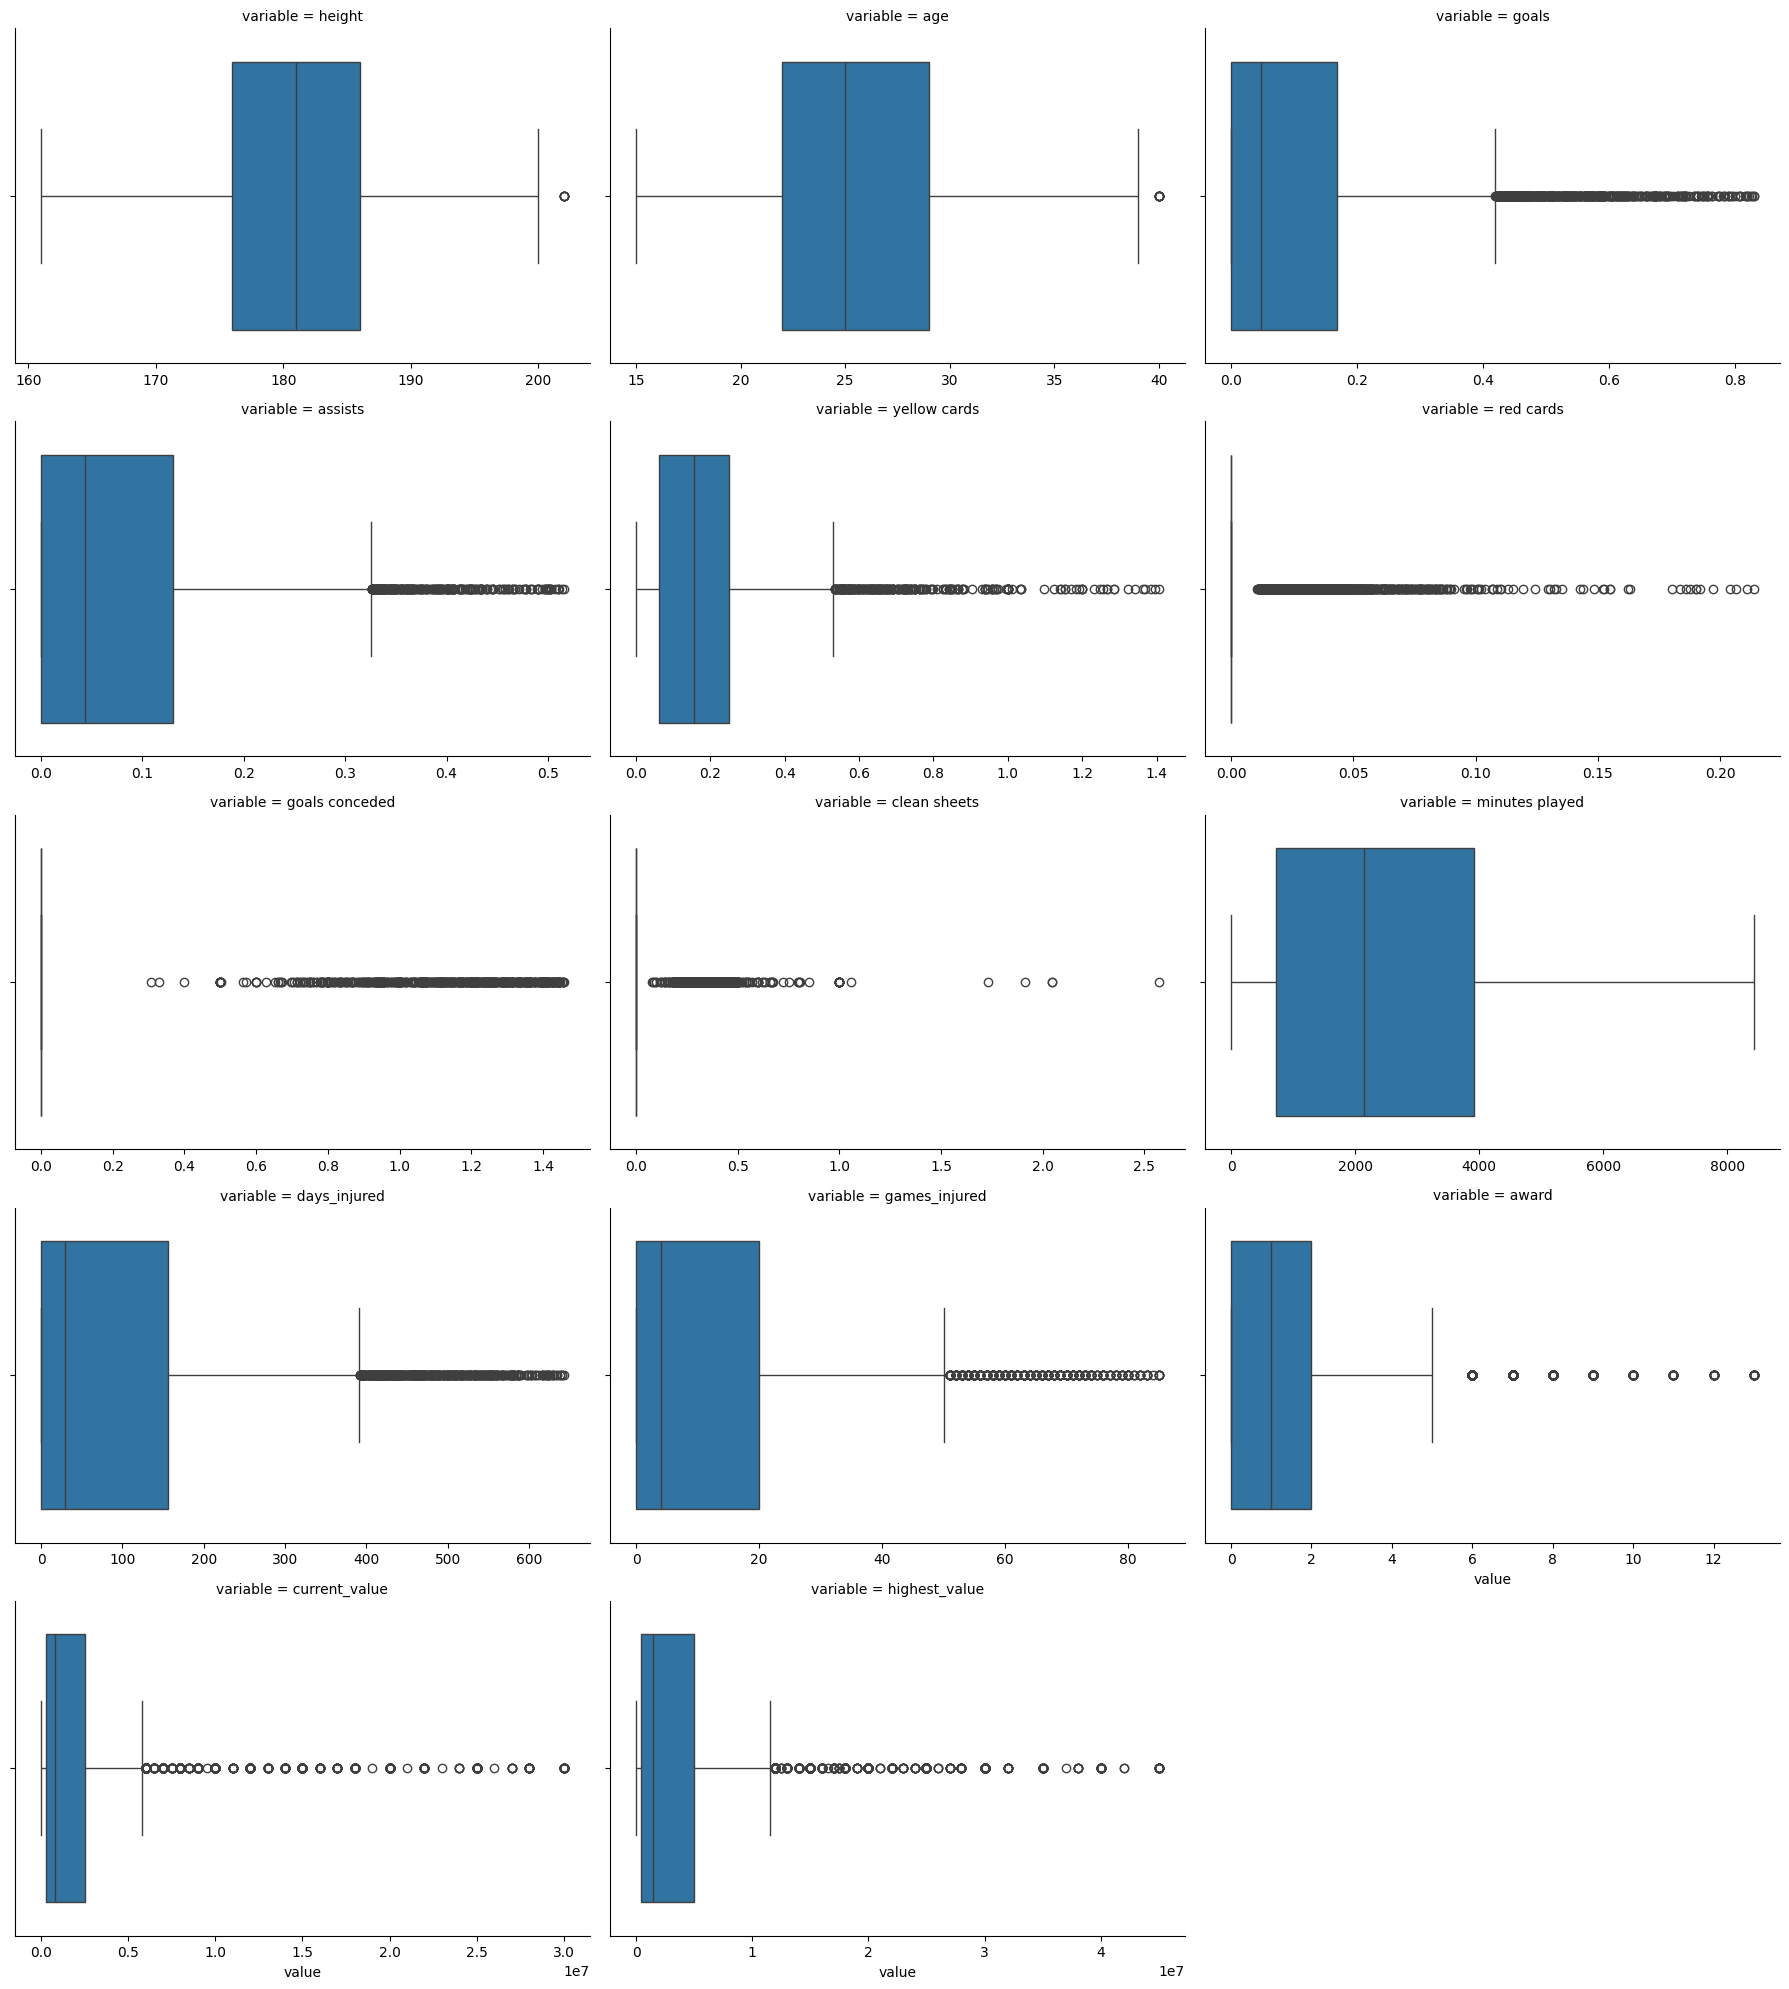

In [36]:
numerical_columns = ['height', 'age', 'goals', 'assists', 'yellow cards', 'red cards', 
                     'goals conceded', 'clean sheets', 'minutes played', 'days_injured', 
                     'games_injured', 'award', 'current_value', 'highest_value']

# Create a long-form DataFrame for easier plotting with FacetGrid
long_data = pd.melt(sports_df, value_vars=numerical_columns)

# Plot using seaborn's FacetGrid
g = sns.FacetGrid(long_data, col="variable", col_wrap=3, height=4, aspect=1.5, sharex=False)
g.map(sns.boxplot, "value")
plt.show()

## 3. Univariate Analysis: 

This involves examining single variables to understand their characteristics (distribution, central tendency, dispersion, and shape).

We calculate **numerical values** about the data that tells us about the distribution of the data. We also **draw graphs** showing visually how the data is distributed. **To answer the following questions about Features/characteristics of Data:**
- Where is the center of the data? (location)
- How much does the data vary? (scale)
- What is the shape of the data? (shape)

**The benefits of this analysis:**
Statistics summary gives a high-level idea to identify whether the data has any outliers, data entry error, distribution of data such as the data is normally distributed or left/right skewed

**In this step, we will explore variables one by one using following approaches:**

### 1. Univariate Graphical Analysis:
Method to perform uni-variate analysis will depend on whether the variable type is categorical or numerical.

In [37]:
# Column Descriptive Statistics
descriptive_stats = sports_df.describe()

In [38]:
# Value Frequency for categorical columns
value_frequency = {column: sports_df[column].value_counts() for column in categorical_columns}

In [39]:
# Range and Outliers are already addressed; displaying ranges
ranges = sports_df[numerical_columns].agg(['min', 'max'])

In [40]:
# Unique Values count
unique_values = sports_df.nunique()

In [41]:
# Step 1: Select only the numeric columns
numeric_columns = sports_df.select_dtypes(include=['number']).columns
numeric_df = sports_df[numeric_columns]

# Step 2: Convert columns to numeric, forcing errors to NaN
numeric_df = numeric_df.apply(pd.to_numeric, errors='coerce')

# Step 3: Calculate correlations
correlations = numeric_df.corr()

In [42]:
# Displaying results
descriptive_stats, value_frequency, ranges, unique_values, correlations

(            height          age   appearance        goals      assists  \
 count  9310.000000  9310.000000  9310.000000  9310.000000  9310.000000   
 mean    180.973884    25.837232    36.592374     0.113941     0.079405   
 std       6.810945     4.639217    25.778697     0.156682     0.098675   
 min     161.000000    15.000000     0.000000     0.000000     0.000000   
 25%     176.000000    22.000000    13.000000     0.000000     0.000000   
 50%     181.000000    25.000000    36.000000     0.048270     0.043599   
 75%     186.000000    29.000000    58.000000     0.167619     0.130288   
 max     202.000000    40.000000   104.000000     0.829213     0.515759   
 
        yellow cards  second yellow cards    red cards  goals conceded  \
 count   9310.000000          9310.000000  9310.000000     9310.000000   
 mean       0.176657             0.003083     0.004559        0.070155   
 std        0.161642             0.010347     0.015709        0.276888   
 min        0.000000       

#### I. Categorical Variables:

we’ll use frequency table to understand distribution of each category
- Bar Chart (Ordinal) - Orderd
- Pie Chart (Nominal) - non Orderd

/var/folders/cg/hvwdcb8s6h3f2v3sbknt313c0000gn/T/ipykernel_2737/2447853793.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




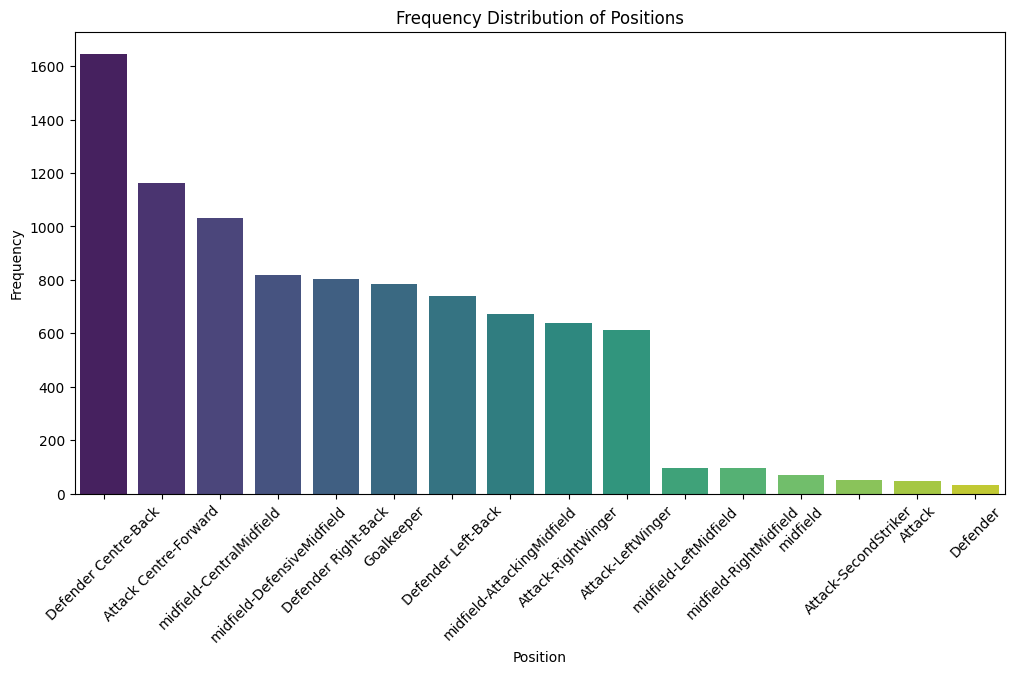

In [43]:
# Create a frequency table for the 'position' column (assuming it is ordinal)
position_counts = sports_df['position'].value_counts()

# Plot a bar chart for the 'position' column
plt.figure(figsize=(12, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')
plt.title('Frequency Distribution of Positions')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

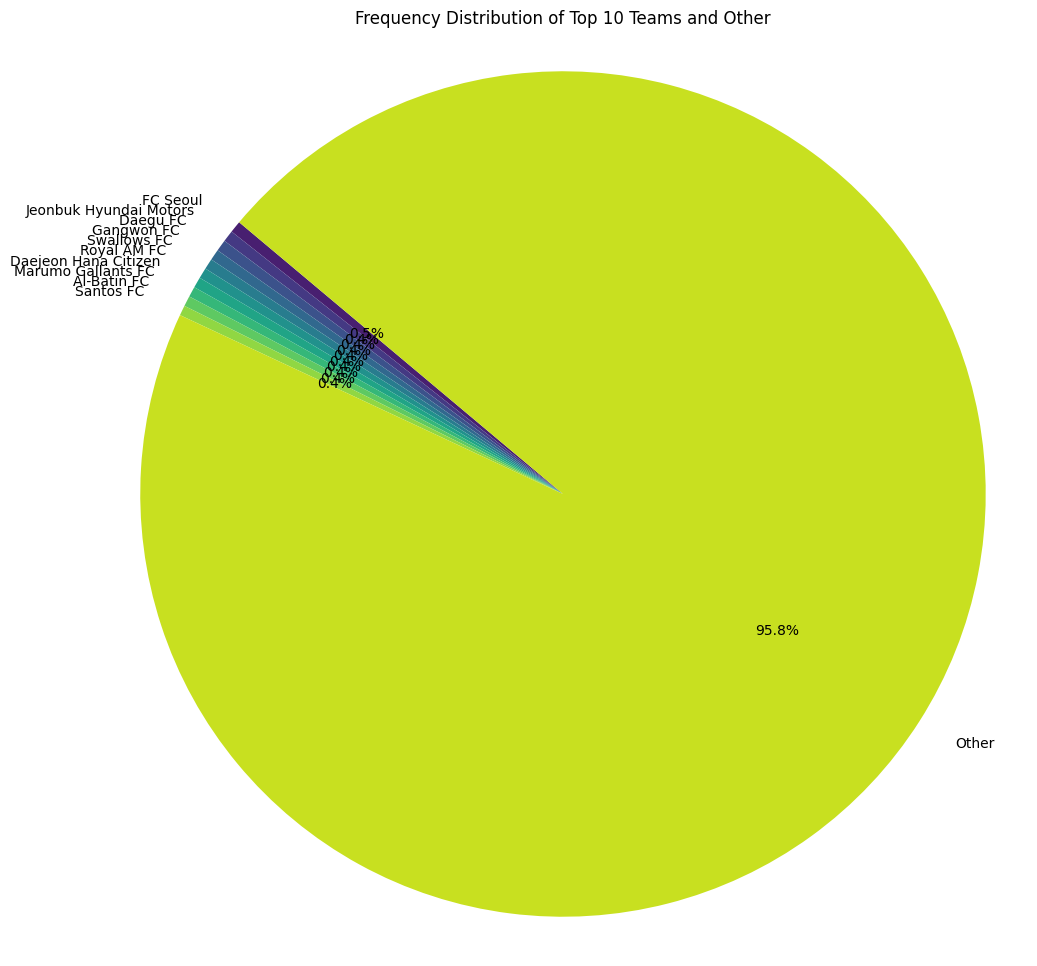

In [44]:
# Create a frequency table for the 'team' column (assuming it is nominal)
team_counts = sports_df['team'].value_counts()

# Limit to top 10 teams and group the rest into 'Other'
top_teams = team_counts.nlargest(10)
other_teams_count = team_counts.iloc[10:].sum()
top_teams['Other'] = other_teams_count

# Plot a pie chart for the top 10 teams and 'Other'
plt.figure(figsize=(12, 12))
plt.pie(top_teams, labels=top_teams.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(top_teams)))
plt.title('Frequency Distribution of Top 10 Teams and Other')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### II. Numerical Variables:

we need to understand the central tendency and spread of the variable (Descriptive Analysis) using:
   - Box plot
   - Histogram

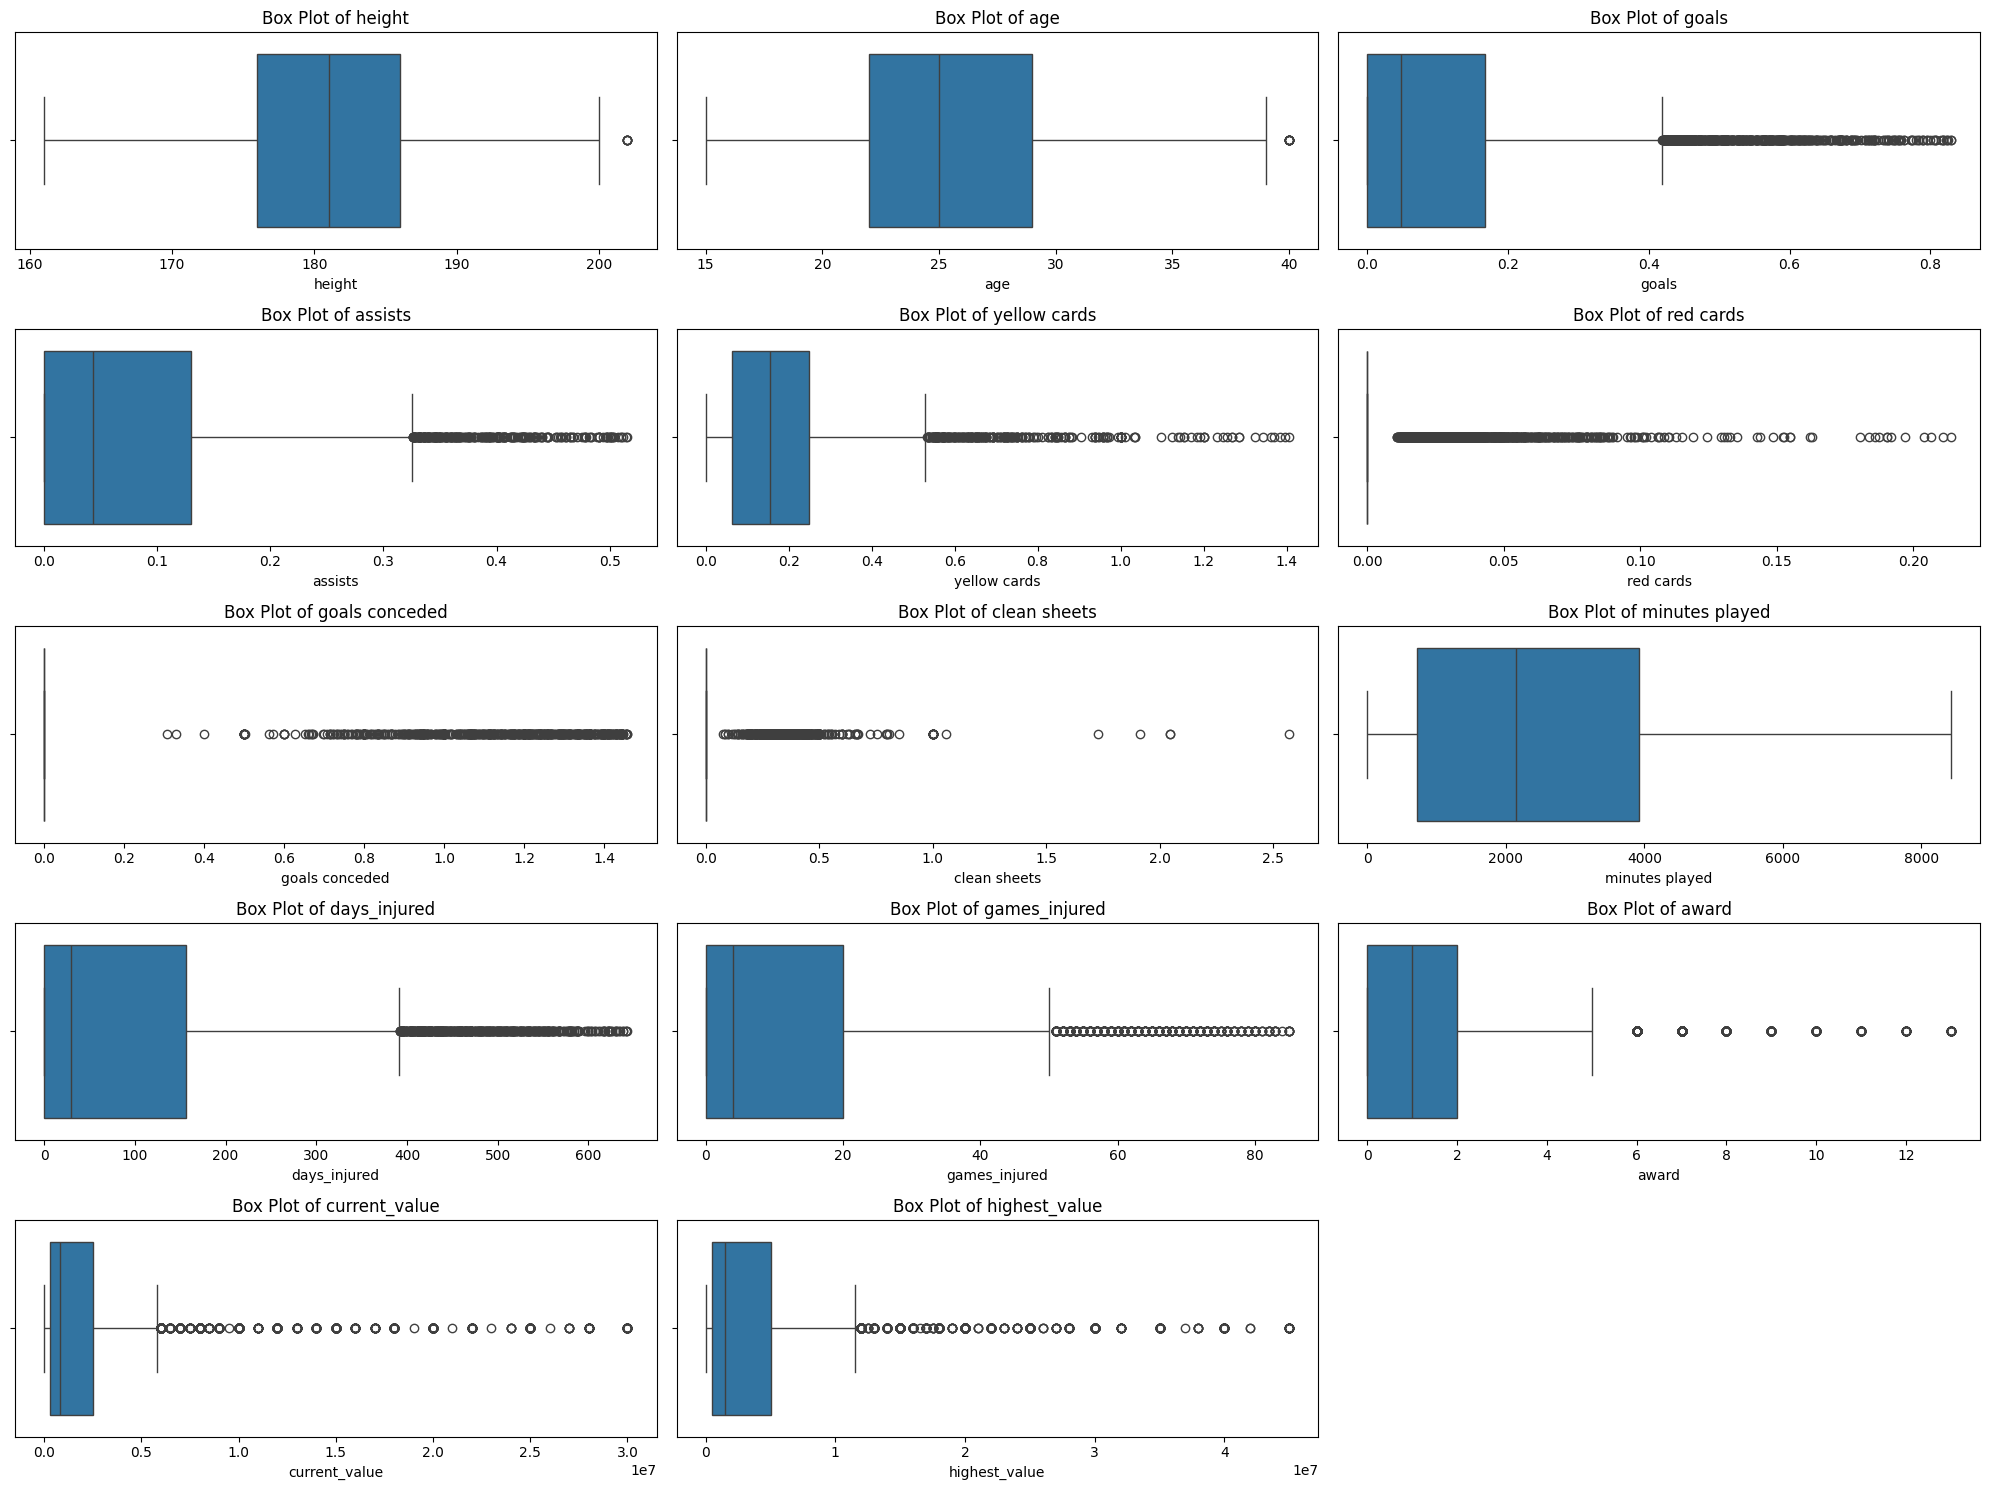

In [45]:
# Plot box plots for numerical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=sports_df[column])
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()

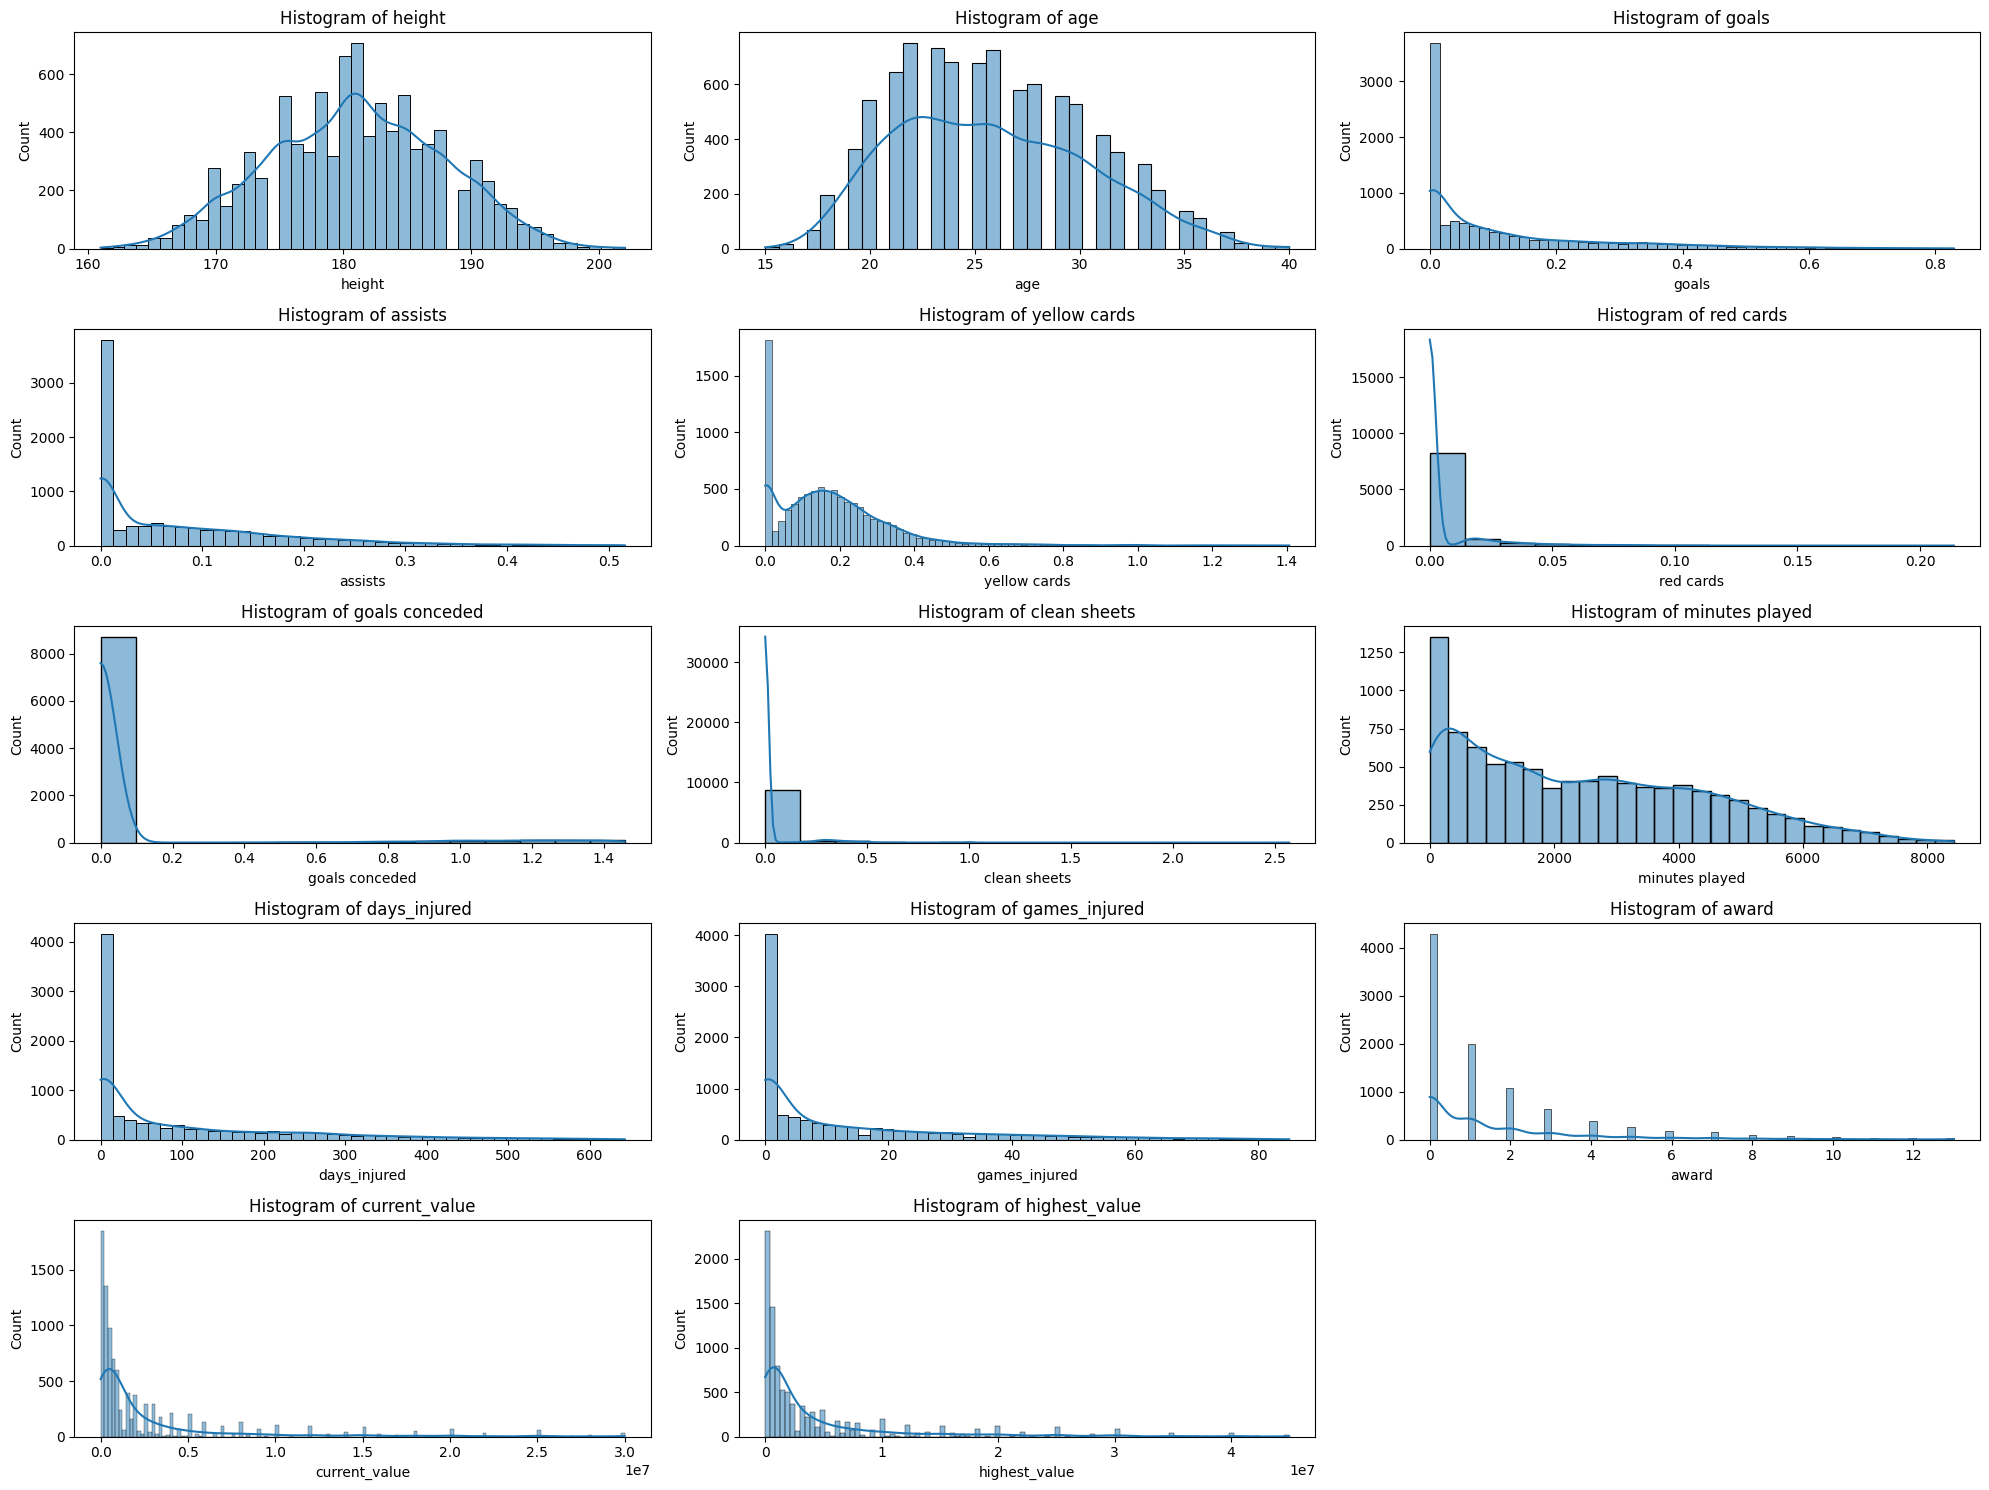

In [46]:
# Plot histograms for numerical columns
plt.figure(figsize=(20, 15))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(5, 3, i)
    sns.histplot(sports_df[column], kde=True)
    plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

### 2. Univariate Non-Graphical analysis: 

- Where is the center of the data? (location) --> **Measures of central tendency**
- How much does the data vary? (scale) --> **Measure of variability**
- What is the shape of the data? (shape) --> **Measures of variation combined with an average (measure of center) gives a good picture of the distribution of the data.**

In [47]:
dt.show(sports_df)

In [48]:
# Calculate measures of variability for numerical columns
variability = sports_df[numerical_columns].agg(['std', 'var', 'min', 'max', 'quantile'])

# Display the results
print("Measures of Variability:")
print(variability)

Measures of Variability:
              height        age     goals   assists  yellow cards  red cards  \
std         6.810945   4.639217  0.156682  0.098675      0.161642   0.015709   
var        46.388971  21.522330  0.024549  0.009737      0.026128   0.000247   
min       161.000000  15.000000  0.000000  0.000000      0.000000   0.000000   
max       202.000000  40.000000  0.829213  0.515759      1.406250   0.213777   
quantile  181.000000  25.000000  0.048270  0.043599      0.155979   0.000000   

          goals conceded  clean sheets  minutes played  days_injured  \
std             0.276888      0.108202    1.950437e+03    135.981209   
var             0.076667      0.011708    3.804206e+06  18490.889203   
min             0.000000      0.000000    0.000000e+00      0.000000   
max             1.457627      2.571429    8.427000e+03    643.000000   
quantile        0.000000      0.000000    2.141500e+03     30.000000   

          games_injured      award  current_value  highest_va

In [49]:
# Calculate skewness and kurtosis for numerical columns
shape_measures = sports_df[numerical_columns].agg(['skew', 'kurt'])

# Display the results
print("Measures of Shape:")
print(shape_measures)

Measures of Shape:
        height       age     goals   assists  yellow cards  red cards  \
skew -0.017784  0.327568  1.738753  1.453749      1.968256   5.679911   
kurt -0.397992 -0.576658  2.764524  1.937947      7.812771  45.812954   

      goals conceded  clean sheets  minutes played  days_injured  \
skew        3.838567      7.398286        0.571180      1.578913   
kurt       13.240050     94.299118       -0.610798      1.891675   

      games_injured     award  current_value  highest_value  
skew       1.569750  2.189997       3.208271       2.752585  
kurt       1.790404  5.278101      11.441966       8.351798  


## 4. Bivariate/Multivariate Analysis:

Here, you look at the relationships between two or more variables. This can involve looking for correlations, patterns, and trends that suggest a relationship or an association.

We can perform bi-variate analysis for any combination of categorical and numerical variables. The combination can be:
| bi-variate variables   | Plot type |
| ------------- | ------------- |
| Categorical & Categorical| Stacked Bar Chart |
| Categorical & numerical  | scatter plot, histogram, box plot|
| numerical  & numerical  | Scatter plot, line chart| 


Multivariate Analysis:
- Heat map
- Bar Chart
- Scatter Chart
- Line Chart

**Categorical & Categorical --> (Stacked Column Chart)**

/var/folders/cg/hvwdcb8s6h3f2v3sbknt313c0000gn/T/ipykernel_2737/417719369.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




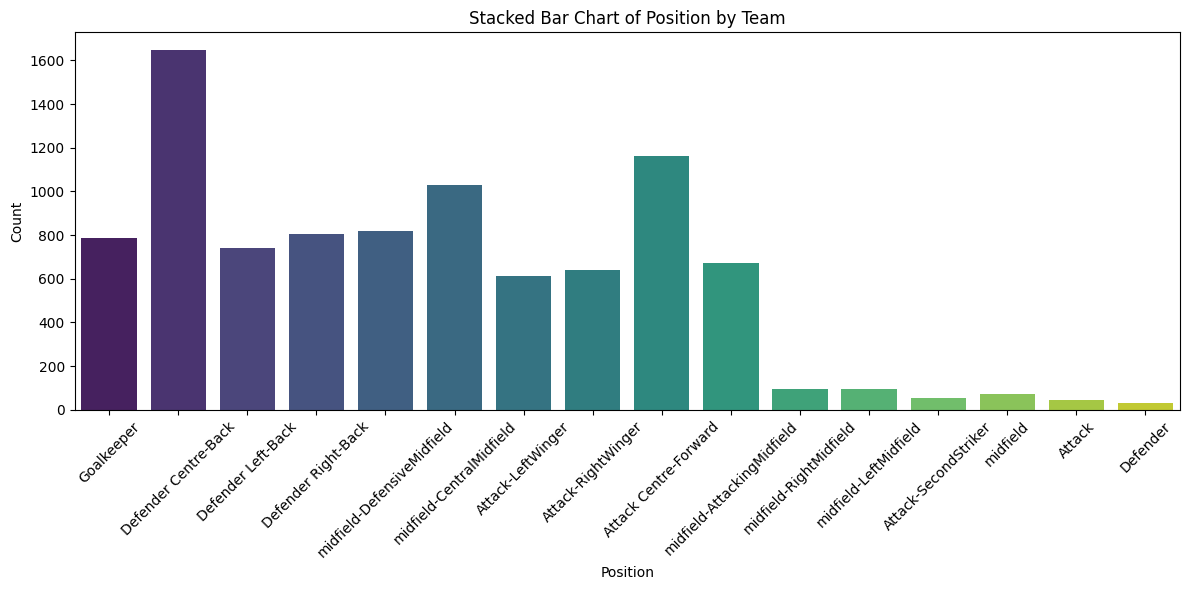

In [50]:
# Stacked Bar Chart for Categorical & Categorical
plt.figure(figsize=(12, 6))
sns.countplot(x='position', data=sports_df, palette='viridis')
plt.title('Stacked Bar Chart of Position by Team')
plt.xlabel('Position')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Categorical & numerical --> (scatter plot, histogram, box plot)**

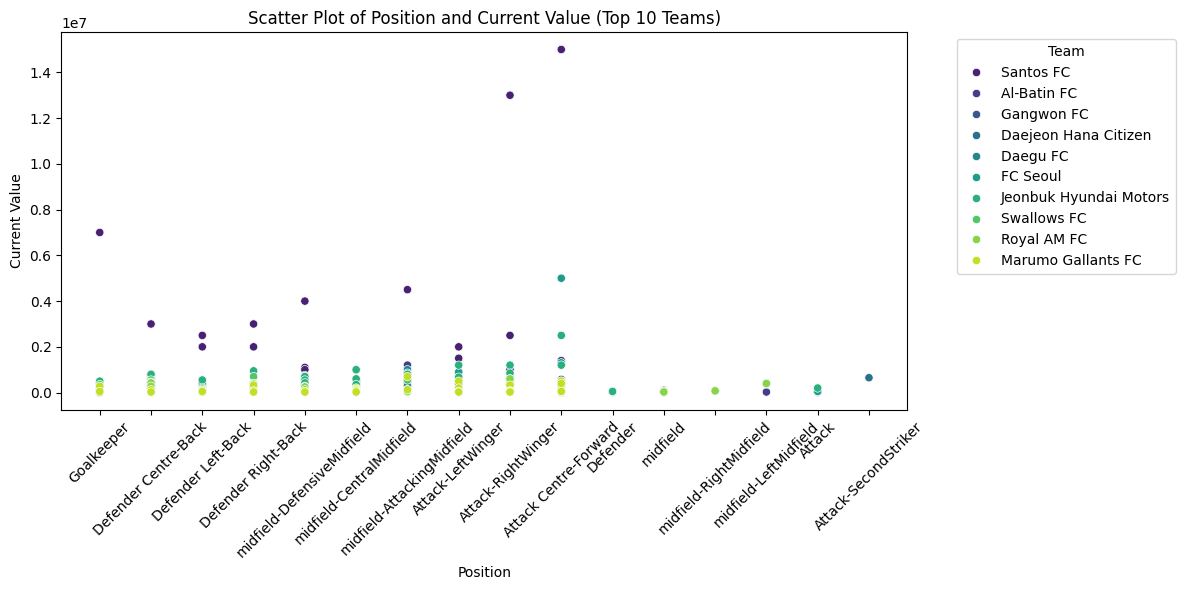

In [51]:
# Filter to include only the top 10 teams based on the number of players
top_teams = sports_df['team'].value_counts().nlargest(10).index
filtered_data = sports_df[sports_df['team'].isin(top_teams)]

# Scatter plot for Categorical (position) & Numerical (current_value)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='position', y='current_value', data=filtered_data, hue='team', palette='viridis')
plt.title('Scatter Plot of Position and Current Value (Top 10 Teams)')
plt.xlabel('Position')
plt.ylabel('Current Value')
plt.xticks(rotation=45)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/cg/hvwdcb8s6h3f2v3sbknt313c0000gn/T/ipykernel_2737/3467148360.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




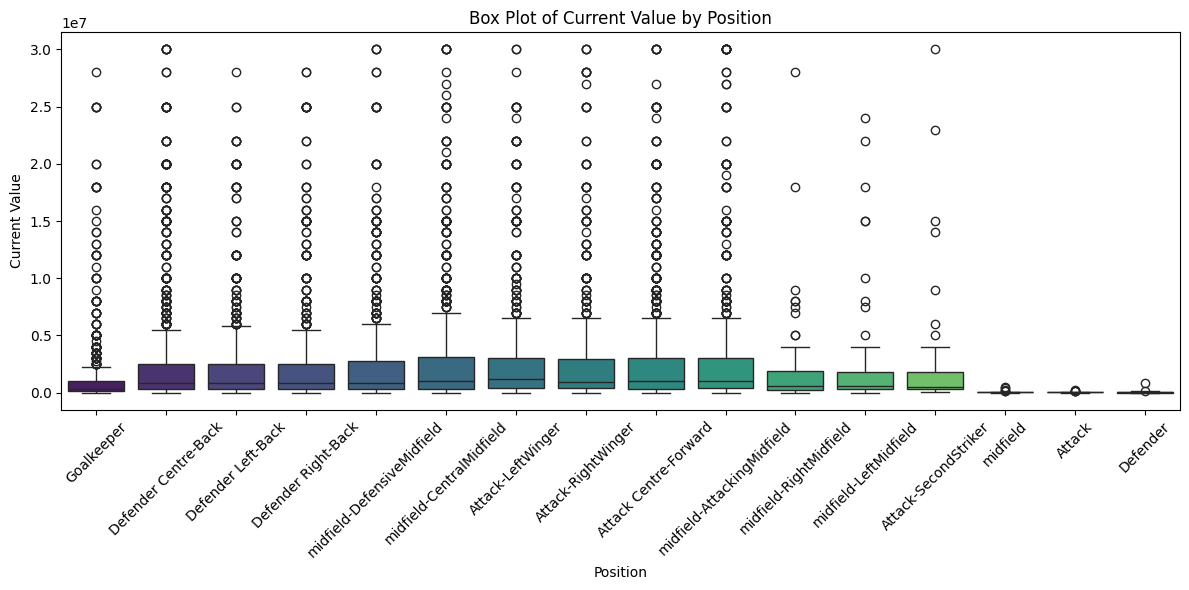

In [52]:
# Box plot for Categorical (position) & Numerical (current_value)
plt.figure(figsize=(12, 6))
sns.boxplot(x='position', y='current_value', data=sports_df, palette='viridis')
plt.title('Box Plot of Current Value by Position')
plt.xlabel('Position')
plt.ylabel('Current Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**numerical & numerical --> (Scatter plot, line chart)**

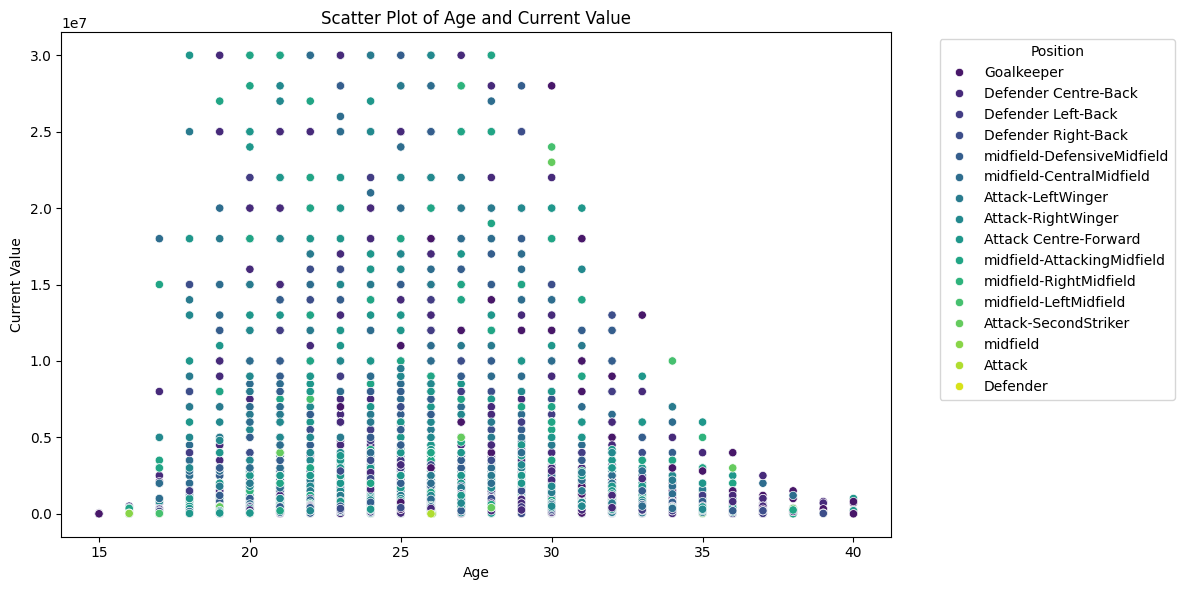

In [53]:
# Scatter plot for Numerical (age) & Numerical (current_value)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='age', y='current_value', data=sports_df, hue='position', palette='viridis')
plt.title('Scatter Plot of Age and Current Value')
plt.xlabel('Age')
plt.ylabel('Current Value')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

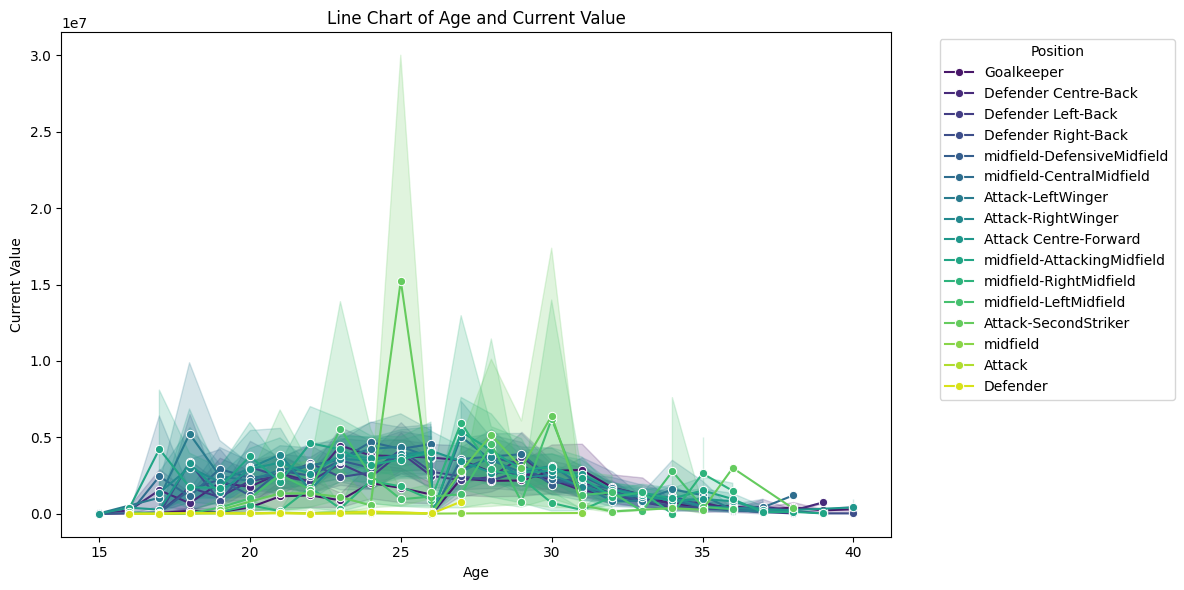

In [54]:
# Line chart for Numerical (age) & Numerical (current_value)
plt.figure(figsize=(12, 6))
sns.lineplot(x='age', y='current_value', data=sports_df, hue='position', palette='viridis', marker='o')
plt.title('Line Chart of Age and Current Value')
plt.xlabel('Age')
plt.ylabel('Current Value')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We could also use a correlation matrix to get more specific information about the relationship between these two variables.

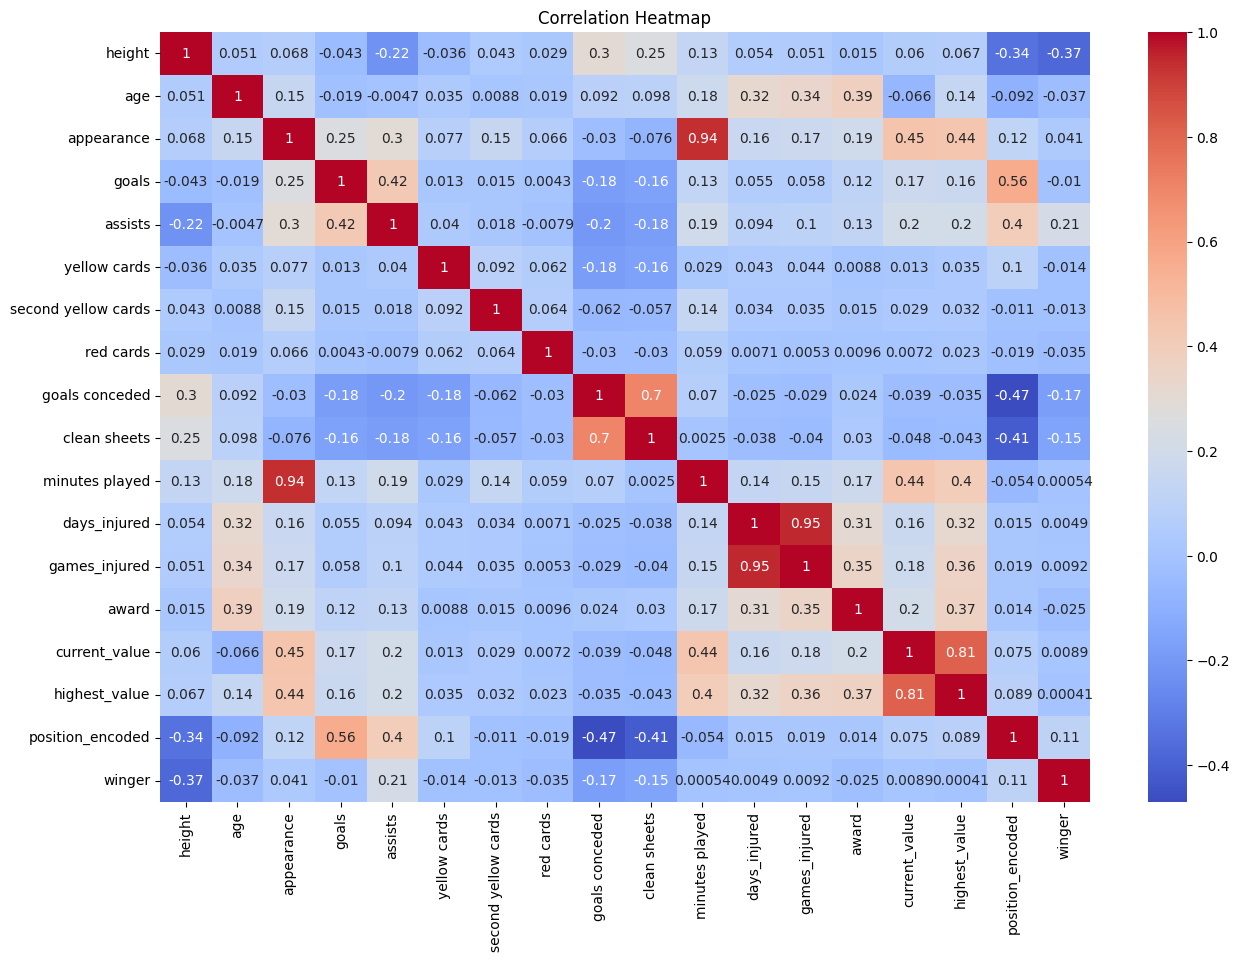

In [55]:
# Select only numerical columns for the correlation heatmap
numerical_data = sports_df.select_dtypes(include='number')

# Heatmap of correlations between numerical variables
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [56]:
host = dt.show(sports_df, host='localhost', subprocess=False)

2024-05-26 21:24:18,044 - INFO     - D-Tale started at: http://kmbywtrwlKhalid:40000


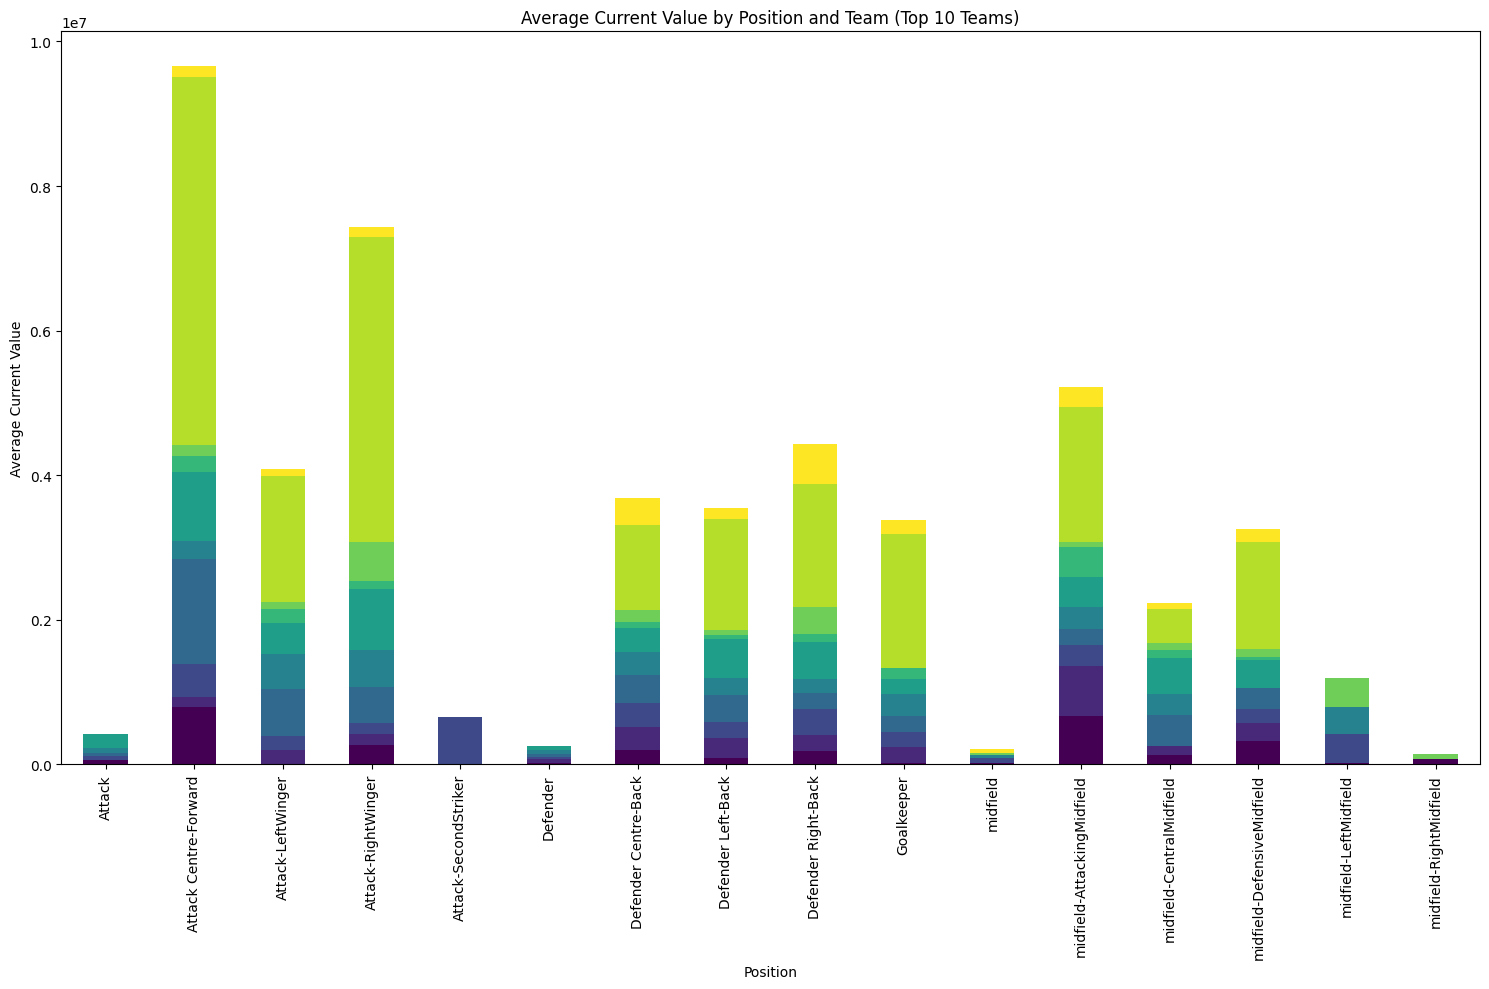

In [57]:
# Filter to include only the top 10 teams based on the number of players
top_teams = sports_df['team'].value_counts().nlargest(10).index
filtered_data = sports_df[sports_df['team'].isin(top_teams)]

# Calculate the average current value by position and team
avg_current_value = filtered_data.groupby(['position', 'team'])['current_value'].mean().unstack()

# Plot the bar chart without the legend label
avg_current_value.plot(kind='bar', stacked=True, figsize=(15, 10), colormap='viridis')
plt.title('Average Current Value by Position and Team (Top 10 Teams)')
plt.xlabel('Position')
plt.ylabel('Average Current Value')
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.legend().set_visible(False)  # Hide the legend
plt.show()

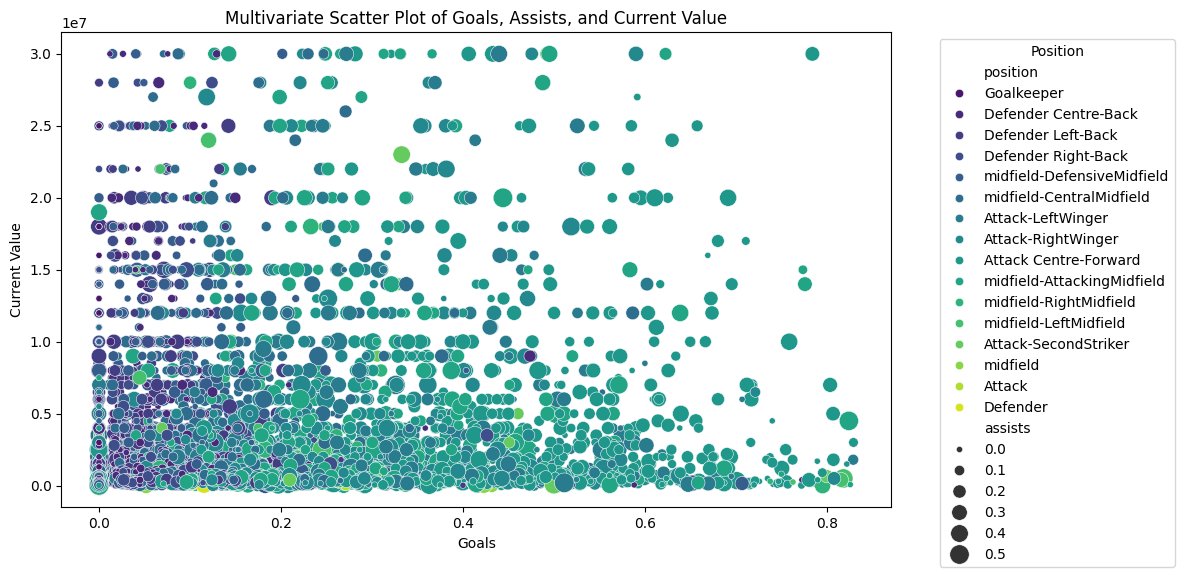

In [58]:
# Scatter chart for multivariate analysis (e.g., goals, assists, and current value)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='goals', y='current_value', size='assists', hue='position', data=sports_df, palette='viridis', sizes=(20, 200))
plt.title('Multivariate Scatter Plot of Goals, Assists, and Current Value')
plt.xlabel('Goals')
plt.ylabel('Current Value')
plt.legend(title='Position', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

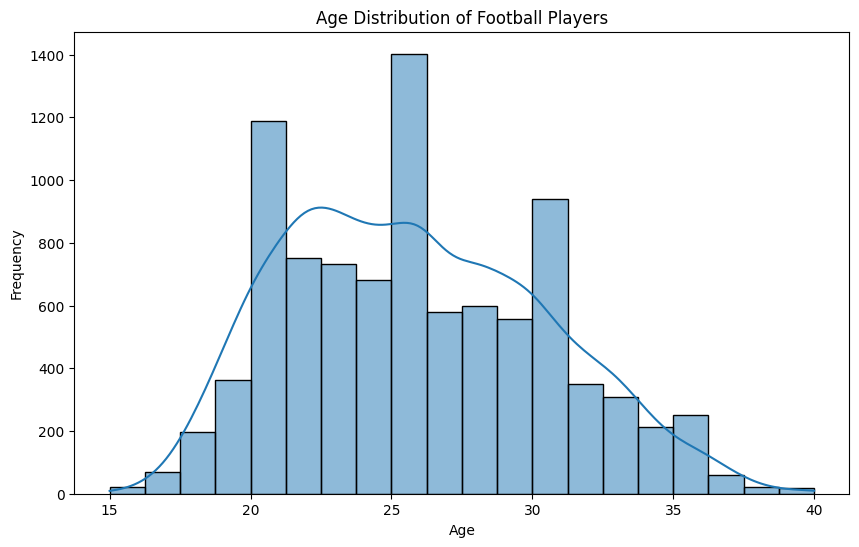

In [59]:
# Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(sports_df['age'], bins=20, kde=True)
plt.title('Age Distribution of Football Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

--**---------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <span style="color:cyan"> *Feature Engineering and Model Training*</span>

In [60]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define feature columns and target variable
feature_columns = ['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards', 
                   'second yellow cards', 'red cards', 'goals conceded', 'clean sheets', 
                   'minutes played', 'days_injured', 'games_injured', 'award', 'position_encoded', 
                   'winger']
target_column = 'current_value'

# Split data into train and test sets
X = sports_df[feature_columns]
y = sports_df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define preprocessor
numerical_features = feature_columns[:-2]
categorical_features = feature_columns[-2:]

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


/Users/kh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



(2087251.3810141853, 3807901.760235573, 0.3458637253973622)

In [61]:
# Step 5: Building Machine Learning Models (Ridge and Lasso)
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV

# Define the pipeline with preprocessing and Ridge regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('ridge', Ridge())
])

# Define the pipeline with preprocessing and Lasso regression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('lasso', Lasso())
])

# Define the parameter grid for Ridge regression
ridge_param_grid = {
    'ridge__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Define the parameter grid for Lasso regression
lasso_param_grid = {
    'lasso__alpha': [0.1, 1.0, 10.0, 100.0]
}

# Perform grid search for Ridge regression
ridge_grid_search = GridSearchCV(ridge_pipeline, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid_search.fit(X_train, y_train)

# Perform grid search for Lasso regression
lasso_grid_search = GridSearchCV(lasso_pipeline, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid_search.fit(X_train, y_train)

# Get the best Ridge model
best_ridge_model = ridge_grid_search.best_estimator_

# Get the best Lasso model
best_lasso_model = lasso_grid_search.best_estimator_

# Display the best parameters for both models
print("Best parameters for Ridge: ", ridge_grid_search.best_params_)
print("Best parameters for Lasso: ", lasso_grid_search.best_params_)


Best parameters for Ridge:  {'ridge__alpha': 10.0}
Best parameters for Lasso:  {'lasso__alpha': 100.0}


In [62]:
# Step 6: Model Evaluation (Ridge and Lasso)
# Predict on the test set using the best Ridge model
y_pred_ridge = best_ridge_model.predict(X_test)

# Predict on the test set using the best Lasso model
y_pred_lasso = best_lasso_model.predict(X_test)

# Evaluate the Ridge model
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge - Mean Absolute Error (MAE): {mae_ridge}')
print(f'Ridge - Root Mean Square Error (RMSE): {rmse_ridge}')
print(f'Ridge - R-squared: {r2_ridge}')

# Evaluate the Lasso model
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Lasso - Mean Absolute Error (MAE): {mae_lasso}')
print(f'Lasso - Root Mean Square Error (RMSE): {rmse_lasso}')
print(f'Lasso - R-squared: {r2_lasso}')

Ridge - Mean Absolute Error (MAE): 2470502.4162646704
Ridge - Root Mean Square Error (RMSE): 3992925.8586771996
Ridge - R-squared: 0.28075102006678276
Lasso - Mean Absolute Error (MAE): 2471136.9249248332
Lasso - Root Mean Square Error (RMSE): 3992971.881922119
Lasso - R-squared: 0.28073443956220856


/Users/kh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.

/Users/kh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.




# Step 7: Communicating Results

## Feature Engineering
#### <span style="color:cyan">*During the EDA process, several features were engineered to enhance model performance. This included transformations such as scaling, encoding categorical variables, and creating interaction terms.*</span>


## Hyperparameter Optimization
#### <span style="color:cyan">*Hyperparameter tuning was conducted using techniques such as grid search and random search to find the optimal parameters for the model. Key hyperparameters were adjusted to improve accuracy and reduce overfitting.*</span>

## Performance Metric Visuals
#### <span style="color:cyan">*The model's performance was evaluated using metrics like accuracy, precision, recall, and F1 score. Visualizations such as ROC curves and confusion matrices were utilized to provide a clear understanding of the model's effectiveness.*</span>

## Feature and Prediction Insights

### Feature Importance
#### <span style="color:cyan">*Feature importance was assessed to identify the most significant variables contributing to the model's predictions. Techniques like feature importance plots from tree-based models or coefficients from linear models were used.*</span>

### Prediction Interpretation
#### <span style="color:cyan">*Predictions were interpreted to understand the model's decision-making process. Tools such as SHAP values and LIME were employed to explain individual predictions and ensure transparency.*</span>

### Limitations
#### <span style="color:cyan">*While the model performed well, several limitations were identified, including potential biases in the data, the need for further hyperparameter tuning, and the possibility of overfitting. These limitations were acknowledged and will be addressed in future work*</span>
    

In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [64]:
# Encode categorical variables
df_encoded = sports_df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

In [65]:
# Encode categorical variables
df_encoded = sports_df.copy()
label_encoders = {}
for column in df_encoded.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df_encoded[column] = label_encoders[column].fit_transform(df_encoded[column])

In [66]:
# Define the features (X) and the target (y)
X = df_encoded.drop('current_value', axis=1)  
y = df_encoded['current_value']  

In [67]:
X = sports_df.drop('current_value', axis=1)  
y = sports_df['current_value']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [69]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Assume X_train is your dataset

numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Create a column transformer to select only numerical columns
ct = ColumnTransformer(transformers=[('numerical', 'passthrough', numerical_cols)], remainder='drop')

# Create a pipeline with the column transformer and the logistic regression model
pipe = Pipeline([('column_transformer', ct), ('log_reg', LogisticRegression())])

# Fit the pipeline to your data
pipe.fit(X_train, y_train)

/Users/kh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Pipeline(steps=[('column_transformer',
                 ColumnTransformer(transformers=[('numerical', 'passthrough',
                                                  Index(['height', 'age', 'appearance', 'goals', 'assists', 'yellow cards',
       'second yellow cards', 'red cards', 'goals conceded', 'clean sheets',
       'minutes played', 'days_injured', 'games_injured', 'award',
       'highest_value', 'position_encoded', 'winger'],
      dtype='object'))])),
                ('log_reg', LogisticRegression())])

In [70]:
# Create a column transformer to select only numerical columns
ct = ColumnTransformer(transformers=[('numerical', 'passthrough', numerical_cols)], remainder='drop')

# Create a pipeline with the column transformer and the logistic regression model
pipe = Pipeline([('column_transformer', ct), ('log_reg', LogisticRegression())])

# Fit the pipeline to your training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Print the predicted values
print(y_pred)

[5000000 5000000 5000000 ... 5000000 3000000 5000000]


/Users/kh/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [71]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
       10000       0.00      0.00      0.00         1
       25000       0.00      0.00      0.00        54
       50000       0.00      0.00      0.00       110
       75000       0.00      0.00      0.00        43
      100000       0.00      0.00      0.00        71
      125000       0.00      0.00      0.00        32
      150000       0.00      0.00      0.00        76
      175000       0.00      0.00      0.00        21
      200000       0.00      0.00      0.00        83
      225000       0.00      0.00      0.00         9
      250000       0.00      0.00      0.00        80
      275000       0.00      0.00      0.00         8
      300000       0.00      0.00      0.00       120
      325000       0.00      0.00      0.00        13
      350000       0.00      0.00      0.00        66
      375000       0.00      0.00      0.00        13
    

/Users/kh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kh/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [72]:
# Split the data
X = sports_df.drop('current_value', axis=1)
y = sports_df['current_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

ValueError: could not convert string to float: '/ole-romeny/profil/spieler/361070'

Accuracy: 0.020945220193340493
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
       25000       0.00      0.00      0.00        32
       50000       0.00      0.00      0.00        76
       75000       0.00      0.00      0.00        32
      100000       0.00      0.00      0.00        47
      125000       0.00      0.00      0.00        20
      150000       0.00      0.00      0.00        48
      175000       0.00      0.00      0.00        16
      200000       0.00      0.00      0.00        53
      225000       0.00      0.00      0.00         5
      250000       0.00      0.00      0.00        49
      275000       0.00      0.00      0.00         7
      300000       0.00      0.00      0.00        77
      325000       0.00      0.00      0.00         9
      350000       0.00      0.00      0.00        39
      375000       0.00      0.00      0.00         5
      400000       0.00    

c:\Users\Khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\Khalid\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



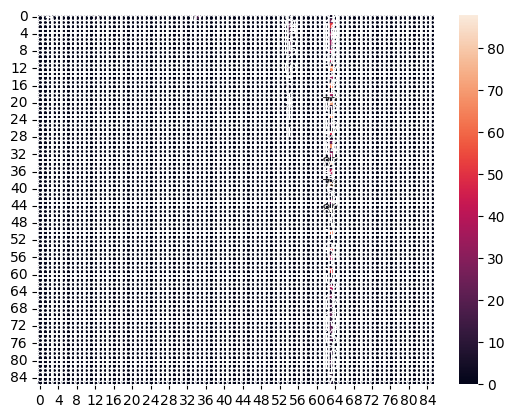

In [ ]:
# Evaluate the model

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d',)
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
# Encode the 'team' column
label_encoder = LabelEncoder()
sports_df['team_encoded'] = label_encoder.fit_transform(sports_df['team'])

/var/folders/cg/hvwdcb8s6h3f2v3sbknt313c0000gn/T/ipykernel_926/1540700599.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Select features and target variable
features = sports_df.drop(columns=['player', 'team', 'name', 'position', 'winger'])
target = sports_df['winger']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train an SVM model
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [ ]:
# Predict on the test set
predictions = svm_model.predict(X_test)

In [ ]:
# Print the accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.68


2024-05-25 20:53:03,367 - INFO     - Executing shutdown due to inactivity...
2024-05-25 20:53:03,440 - INFO     - Executing shutdown...
2024-05-25 20:53:03,441 - INFO     - Not running with the Werkzeug Server, exiting by searching gc for BaseWSGIServer


In [75]:
# Select only numeric columns for scaling
numeric_data = sports_df.select_dtypes(include=['float64', 'int64'])

# Alternatively, if you need to handle specific non-numeric columns
# data['column_name'] = data['column_name'].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values that resulted from conversion
numeric_data = numeric_data.dropna()

In [78]:
# Scale the numeric data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

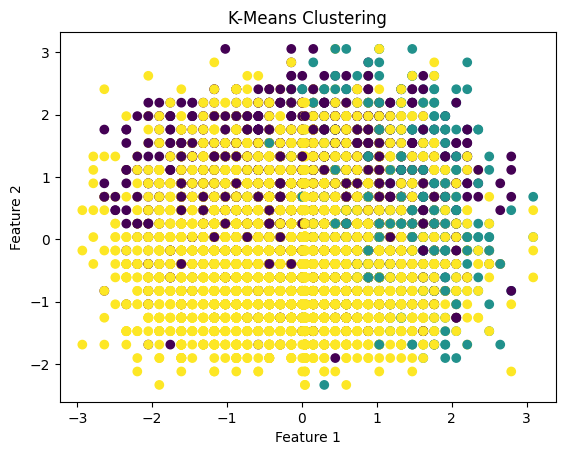

In [79]:
# K-Means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)
kmeans.fit(scaled_data)
numeric_data['Cluster'] = kmeans.labels_

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.show()

In [80]:
# K-Nearest Neighbors (KNN)
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(scaled_data, numeric_data['Cluster'], test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))

Accuracy: 0.9491586108127461
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92       894
           1       1.00      1.00      1.00       174
           2       0.94      0.98      0.96      1725

    accuracy                           0.95      2793
   macro avg       0.97      0.95      0.96      2793
weighted avg       0.95      0.95      0.95      2793

